In [1]:



import matplotlib.pyplot as plt
import seaborn as sns





In [2]:

import pandas as pd

df = pd.read_csv('Data/sleep_health.csv')

df


,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [3]:
df.isnull().sum()

Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


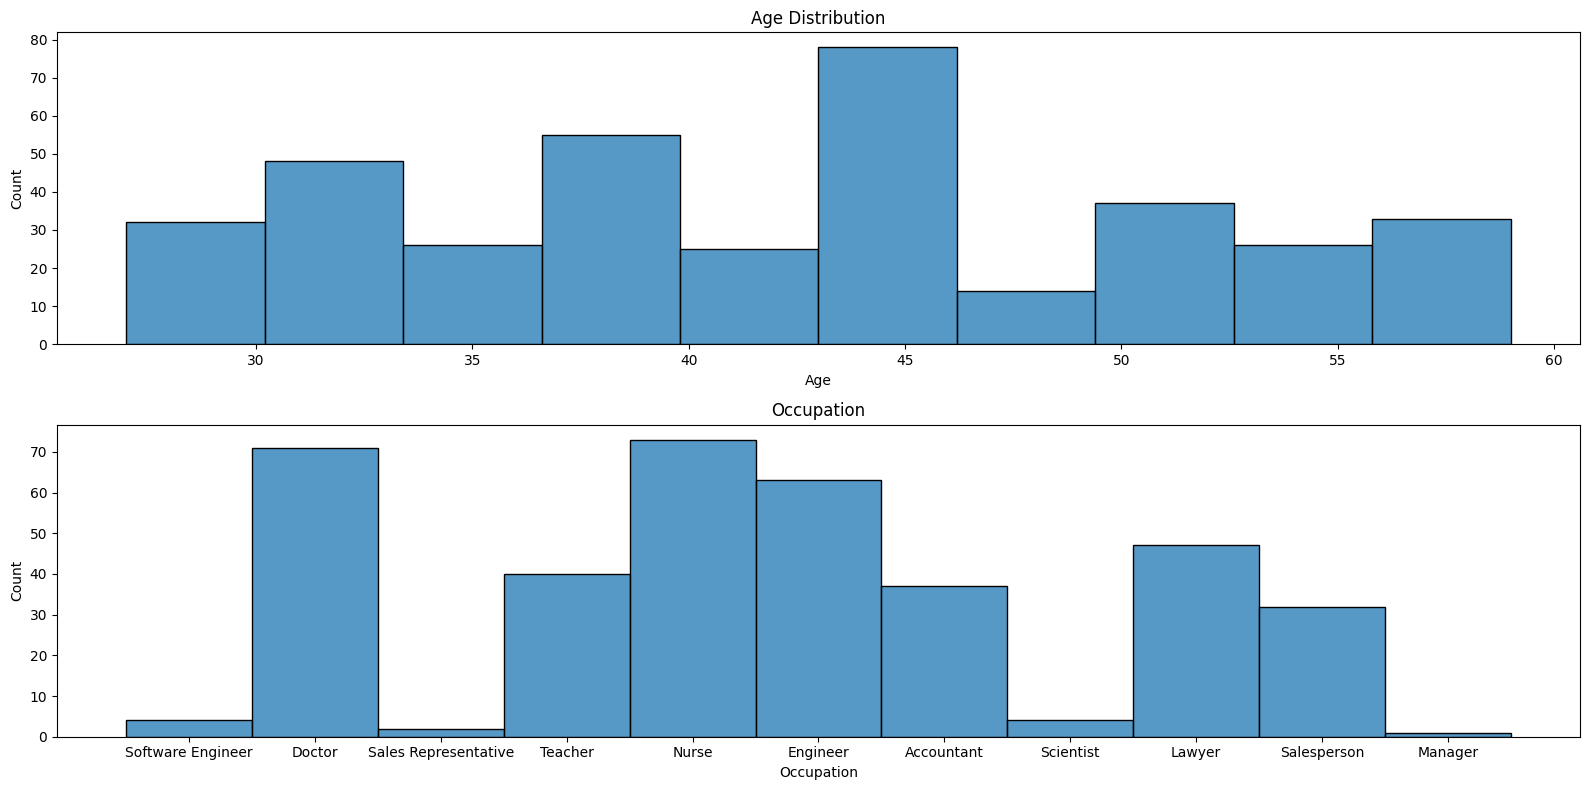

In [5]:
plt.figure(figsize = (16,8))


plt.subplot(2, 1, 1)


sns.histplot(df['Age'])
plt.title('Age Distribution')

plt.subplot(2,1,2)

sns.histplot(df['Occupation'])

plt.title("Occupation")

plt.tight_layout()
plt.show()



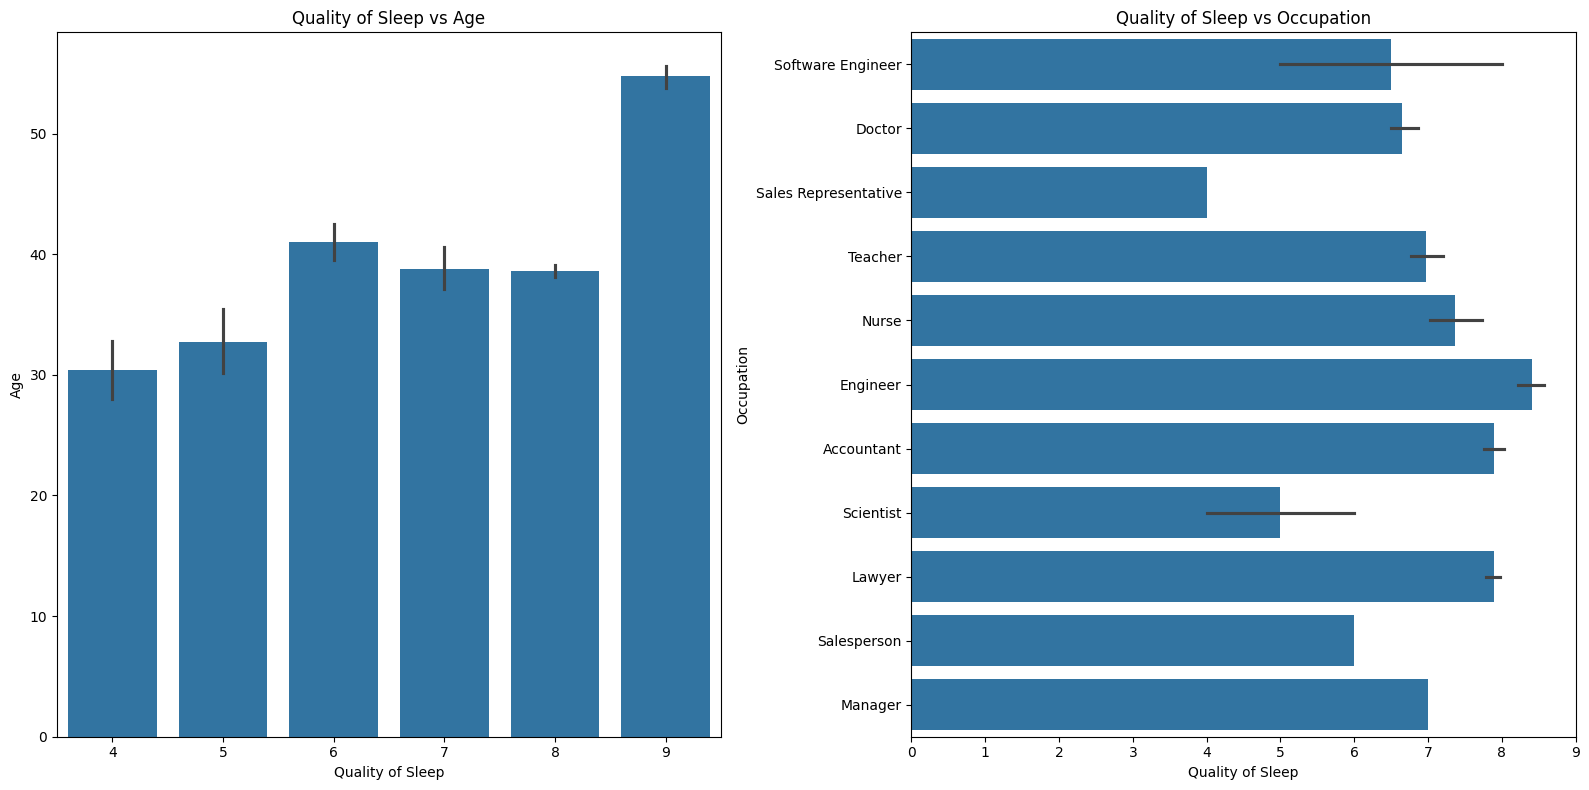

In [6]:
plt.figure(figsize = (16,8))

plt.subplot(1, 2, 1)
sns.barplot(df, x = 'Quality of Sleep', y = 'Age')
plt.title("Quality of Sleep vs Age")



plt.subplot(1, 2, 2)
sns.barplot(df, x = 'Quality of Sleep', y = 'Occupation')
plt.title("Quality of Sleep vs Occupation")
plt.tight_layout()
plt.show()



## **Preprocessing**

Let's look at missing values, min and max


In [7]:
df.isnull().sum()

Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64

In [8]:
print(df.describe().loc[['min', 'max']])

     Person ID   Age  Sleep Duration  Quality of Sleep  \
min        1.0  27.0             5.8               4.0   
max      374.0  59.0             8.5               9.0   

     Physical Activity Level  Stress Level  Heart Rate  Daily Steps  
min                     30.0           3.0        65.0       3000.0  
max                     90.0           8.0        86.0      10000.0  


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


**Insight**

We have no missing values or outliers
So let's label encode most of object feature. Let's have a look at those columns to know what we are dealing with

In [10]:
df['Sleep Disorder'].unique()

array([nan, 'Sleep Apnea', 'Insomnia'], dtype=object)

In [11]:
df['Occupation'].unique()

array(['Software Engineer', 'Doctor', 'Sales Representative', 'Teacher',
       'Nurse', 'Engineer', 'Accountant', 'Scientist', 'Lawyer',
       'Salesperson', 'Manager'], dtype=object)

In [12]:
df['BMI Category'].unique()

array(['Overweight', 'Normal', 'Obese', 'Normal Weight'], dtype=object)

In [13]:
df['Blood Pressure'].unique()

array(['126/83', '125/80', '140/90', '120/80', '132/87', '130/86',
       '117/76', '118/76', '128/85', '131/86', '128/84', '115/75',
       '135/88', '129/84', '130/85', '115/78', '119/77', '121/79',
       '125/82', '135/90', '122/80', '142/92', '140/95', '139/91',
       '118/75'], dtype=object)

It looks like `gender` and `Blood Pressure` will need special care

- `gender` will convert to boolean value (turn to `int`)
- `Blood Pressure` will be split into `Systolic` and `Diastolic`, based from my research `Systolic` matters more for *Sleep Quality* so we will use that for our correlation

The rest can be encode with `pd.get_dummies` And notice in `BMI Category` there are `Normal` and `Normal Weight` and I assume that they are the same thing so we will merge them into one

In [14]:
df = pd.get_dummies(df, columns = ['Sleep Disorder', 'Occupation', 'BMI Category'], dtype = int)
df[['Systolic', 'Diastolic']] = df['Blood Pressure'].str.split('/', expand = True).astype(int)
df['is_Male'] = (df['Gender'] == "Male").astype(int)


df['BMI Category_Normal'] = df[['BMI Category_Normal', 'BMI Category_Normal Weight']].max(axis=1)


df = df.drop(columns = ['Blood Pressure', 'Gender', 'BMI Category_Normal Weight'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 27 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Person ID                        374 non-null    int64  
 1   Age                              374 non-null    int64  
 2   Sleep Duration                   374 non-null    float64
 3   Quality of Sleep                 374 non-null    int64  
 4   Physical Activity Level          374 non-null    int64  
 5   Stress Level                     374 non-null    int64  
 6   Heart Rate                       374 non-null    int64  
 7   Daily Steps                      374 non-null    int64  
 8   Sleep Disorder_Insomnia          374 non-null    int32  
 9   Sleep Disorder_Sleep Apnea       374 non-null    int32  
 10  Occupation_Accountant            374 non-null    int32  
 11  Occupation_Doctor                374 non-null    int32  
 12  Occupation_Engineer   

In [15]:
df.columns

Index(['Person ID', 'Age', 'Sleep Duration', 'Quality of Sleep',
       'Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps',
       'Sleep Disorder_Insomnia', 'Sleep Disorder_Sleep Apnea',
       'Occupation_Accountant', 'Occupation_Doctor', 'Occupation_Engineer',
       'Occupation_Lawyer', 'Occupation_Manager', 'Occupation_Nurse',
       'Occupation_Sales Representative', 'Occupation_Salesperson',
       'Occupation_Scientist', 'Occupation_Software Engineer',
       'Occupation_Teacher', 'BMI Category_Normal', 'BMI Category_Obese',
       'BMI Category_Overweight', 'Systolic', 'Diastolic', 'is_Male'],
      dtype='object')

Let's set up some **correlation matrix**, the encoded one will have their own separated table underneath

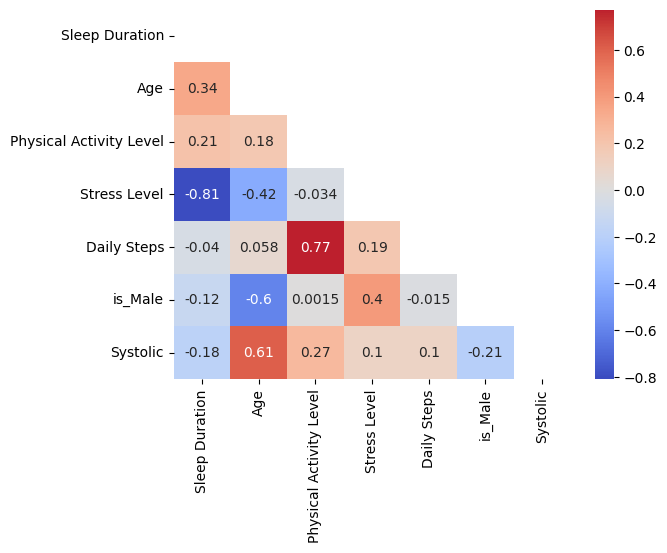

In [16]:
import numpy as np
corr_df = df[['Sleep Duration', 'Age',  'Physical Activity Level', 'Stress Level', 'Daily Steps',
              'is_Male', 'Systolic']].copy()

matrix = corr_df.corr()

mask = np.triu(np.ones_like(matrix, dtype=bool))

sns.heatmap(matrix, mask = mask, cmap = 'coolwarm', annot = True, center = 0)

plt.show()

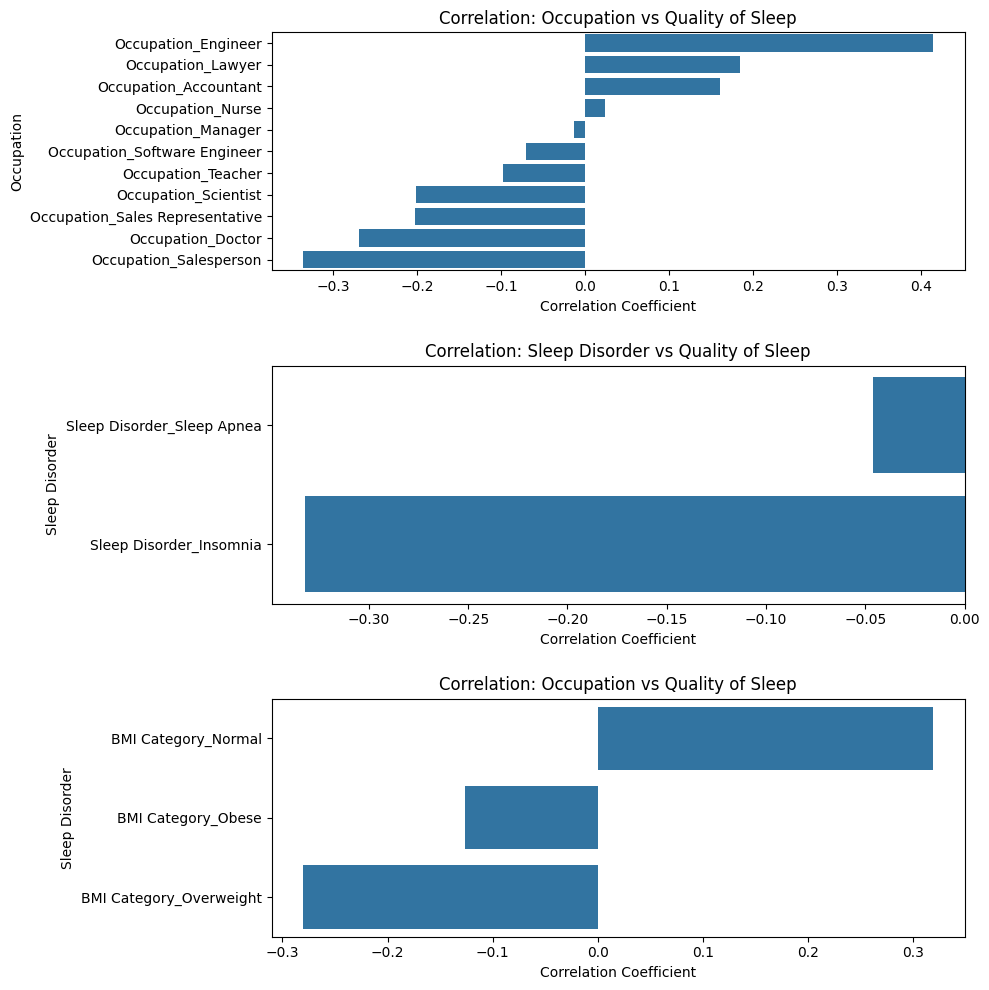

In [17]:


all_corr = df.corr()['Quality of Sleep']

occ_corr = all_corr.filter(like='Occupation').sort_values(ascending=False)
sleep_dis_corr = all_corr.filter(like='Sleep Disorder').sort_values(ascending=False)
bmi_corr = all_corr.filter(like = 'BMI Category').sort_values(ascending= False)


plt.figure(figsize=(10, 10))

plt.subplot(3, 1, 1)
sns.barplot(x=occ_corr.values, y=occ_corr.index)
plt.title('Correlation: Occupation vs Quality of Sleep')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Occupation')

plt.subplot(3, 1, 2)
sns.barplot(x=sleep_dis_corr.values, y=sleep_dis_corr.index)
plt.title('Correlation: Sleep Disorder vs Quality of Sleep')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Sleep Disorder')


plt.subplot(3, 1, 3)
sns.barplot(x=bmi_corr.values, y=bmi_corr.index)
plt.title('Correlation: Occupation vs Quality of Sleep')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Sleep Disorder')

plt.tight_layout()

plt.subplots_adjust(hspace=0.4)
plt.show()



In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 27 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Person ID                        374 non-null    int64  
 1   Age                              374 non-null    int64  
 2   Sleep Duration                   374 non-null    float64
 3   Quality of Sleep                 374 non-null    int64  
 4   Physical Activity Level          374 non-null    int64  
 5   Stress Level                     374 non-null    int64  
 6   Heart Rate                       374 non-null    int64  
 7   Daily Steps                      374 non-null    int64  
 8   Sleep Disorder_Insomnia          374 non-null    int32  
 9   Sleep Disorder_Sleep Apnea       374 non-null    int32  
 10  Occupation_Accountant            374 non-null    int32  
 11  Occupation_Doctor                374 non-null    int32  
 12  Occupation_Engineer   

I am also gonna do some *standard scaling*

In [19]:
from sklearn.preprocessing import StandardScaler


cols_to_scale = [
    'Age',
    'Sleep Duration',
    'Physical Activity Level',
    'Stress Level',
    'Heart Rate',
    'Daily Steps',
    'Systolic',
    'Diastolic'
]


scaler = StandardScaler()

df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])



In [20]:
df.head(1)

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Sleep Disorder_Insomnia,Sleep Disorder_Sleep Apnea,...,Occupation_Salesperson,Occupation_Scientist,Occupation_Software Engineer,Occupation_Teacher,BMI Category_Normal,BMI Category_Obese,BMI Category_Overweight,Systolic,Diastolic,is_Male
0,1,-1.753096,-1.298887,6,-0.825418,0.347021,1.654719,-1.619584,0,0,...,0,0,1,0,0,0,1,-0.330002,-0.268102,1
